In [1]:
import pandas as pd
import numpy  as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import streamlit as st
import requests
from io import StringIO
import os
from pywaffle import Waffle

# Conectar a la base de datos SQLite
conn = sqlite3.connect(r"C:\Users\Alvarez\Documents\GitHub\SALUD MENTAL EN LA INDUSTRIA TECNOLÓGICA 1.sqlite")

cur = conn.cursor()

In [2]:
# Consultar las tablas en la base de datos
consulta_ntablas = "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"


# Mostrar las entidades
print("Entidades en la base de datos:")
entidades = pd.read_sql_query(sql = consulta_ntablas, con = conn)
entidades

Entidades en la base de datos:


,name
0,Answer
1,Question
2,Respuestas
3,Survey


In [3]:
# Crear consulta para convertir en DF
consulta = "SELECT * FROM Respuestas;"

df_Respuestas = pd.read_sql_query(sql = consulta, con = conn)

conn.close()

In [4]:
# Filtrado del DF por desde 2016-2019 y Estados Unidos como país para realizar la Investigación
User_ID = df_Respuestas[(df_Respuestas['QuestionID'] == 3) & (df_Respuestas['AnswerText'] == 'Estados Unidos')]['UserID'].unique()

df_Investigacion1 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2016)]

df_Investigacion2 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2017)]

df_Investigacion3 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2018)]

df_Investigacion4 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2019)]

In [5]:
# Reestructuración del DF para mejor uso de Pandas
df_Investigacion1 = df_Investigacion1.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion2 = df_Investigacion2.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion3 = df_Investigacion3.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion4 = df_Investigacion4.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion1 = df_Investigacion1.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion2 = df_Investigacion2.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion3 = df_Investigacion3.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion4 = df_Investigacion4.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

In [6]:
# Renombrar las variables 2016
print(df_Investigacion1.columns)

df_Investigacion1.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', '¿Cree que los Miembros de su Equipo/Compañeros de Trabajo le Verían de Forma más Negativa Si Supieran que Padece una Enfermedad Mental?', 'Enfermedades Mentales Diagnosticadas', 'Enfermedades Mentales No Diagnosticadas', 'Puesto de Trabajo', 'Trabajo Remoto']

# Reemplazar los NaN
df_Investigacion1 = df_Investigacion1.fillna('No respondió')

Index([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  14,  16,  17,  18,
        19,  20,  23,  24,  27,  28,  30,  31,  33,  34,  48,  49,  53,  54,
        55,  56, 114, 115, 116, 117, 118],
      dtype='int64', name='QuestionID')


In [7]:
# Renombrar las variables 2017
print(df_Investigacion2.columns)

df_Investigacion2.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion2 = df_Investigacion2.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [8]:
# Renombrar las variables 2018
print(df_Investigacion3.columns)

df_Investigacion3.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion3 = df_Investigacion3.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [9]:
# Renombrar las variables 2019
print(df_Investigacion4.columns)

df_Investigacion4.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion4 = df_Investigacion4.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [10]:
# Carpeta donde deseas guardar los archivos CSV
output_folder = r"C:\Users\Alvarez\Documents\GitHub\CSV"

# Crear la carpeta si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Guardar los archivos CSV en la carpeta especificada
df_Investigacion1.to_csv(os.path.join(output_folder, 'Investigacion1.csv'), index=False)
df_Investigacion2.to_csv(os.path.join(output_folder, 'Investigacion2.csv'), index=False)
df_Investigacion3.to_csv(os.path.join(output_folder, 'Investigacion3.csv'), index=False)
df_Investigacion4.to_csv(os.path.join(output_folder, 'Investigacion4.csv'), index=False)

In [11]:
# HTML
# Título de la aplicación
st.title("Problemáticas y Estigmas de las Enfermedades Mentales en la Industria Tecnológica Estadounidense 2016-2019")

# Contenido de la página 1
st.header("Introducción")
st.write("Información de la Data Suministrada.")

# Contenido de la página 2
st.header("Visualización de los Datos")
st.write("Información de la Data Suministrada.")

@st.cache
def load_csv_from_github(url):
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        st.error("Failed to load data from GitHub.")
        return None

# URLs of CSV files in GitHub repository
urls = {
    '2016': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion1.csv',
    '2017': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion2.csv',
    '2018': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion3.csv',
    '2019': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion4.csv'
}

# Load CSV files from GitHub
df_2016 = load_csv_from_github(urls['2016'])
df_2017 = load_csv_from_github(urls['2017'])
df_2018 = load_csv_from_github(urls['2018'])
df_2019 = load_csv_from_github(urls['2019'])

# Crea un selectbox con las opciones
option = st.selectbox('Año de Encuesta:', ['2016', '2017', '2018', '2019'])

# Muestra el DataFrame correspondiente según la opción seleccionada
if option == '2016':
    st.dataframe(df_2016)
elif option == '2017':
    st.dataframe(df_2017)
elif option == '2018':
    st.dataframe(df_2018)
elif option == '2019':
    st.dataframe(df_2019)


2024-06-27 15:01:08.607 
  command:

    streamlit run C:\Users\Alvarez\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `load_csv_from_github()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function load_csv_from_github at 0x000001EB4023D580>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

In [12]:
#PREGUNTA 3

# Assuming 'df_Investigacion1' is your DataFrame
filtered_df = df_Investigacion1[df_Investigacion1['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df = filtered_df.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df = df_Investigacion1.merge(grouped_df, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new_df = resultado_df[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si'
new_df = new_df[new_df['Situación Mental Actual'] == 'Si']

counts = new_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts)

counts = new_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts)


counts_df = counts.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts_df['Porcentaje'] = (counts / counts.sum()) * 100
counts_df['Porcentaje'] = counts_df['Porcentaje'].round(2)
# Agregar fila con el total
counts_df.loc['Total'] = [counts.sum(), 100.00]
print(counts_df)


Cantidad de Empleados en la Empresa_x
26-100          85
Más de 1000     82
100-500         80
No respondió    65
6-25            50
500-1000        19
1-5             12
Name: count, dtype: int64
Cantidad de Empleados en la Empresa_x
26-100          85
Más de 1000     82
100-500         80
No respondió    65
6-25            50
500-1000        19
1-5             12
Name: count, dtype: int64
                                       Cantidad de Personas con Enfermedad Mental dentro de la Empresa  \
Cantidad de Empleados en la Empresa_x                                                                    
26-100                                                                              85.0                 
Más de 1000                                                                         82.0                 
100-500                                                                             80.0                 
No respondió                                                                

In [13]:
#¿Estas ofrecen algún beneficio o algún tipo de convenio de trabajo?

Empresa = df_Investigacion1[["Cantidad de Empleados en la Empresa", "Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda", "Situación Mental Actual"]].copy()
Empresa = df_Investigacion1[df_Investigacion1 != "No respondió"]
Empresa

#para saber el numero de personas que tienen una enfermedad mental y saben de los benficios dque ofrece su empresa
Empresa = df_Investigacion1[["Cantidad de Empleados en la Empresa", "Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda", "Situación Mental Actual"]].copy()
Empresa_filtered = Empresa[Empresa != "No respondió"]
count = (Empresa_filtered["Cantidad de Empleados en la Empresa"] == "Más de 1000") & (Empresa_filtered["Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda"] == "Si") & (Empresa_filtered["Situación Mental Actual"] == "Si")
count.sum()


44

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

df1 = pd.DataFrame([["1-5", "3", "2"], ["6-25", "19", "9"], ["26-100", "50", "25"], ["100-500", "80", "21"], ["500-1000", "85", "8"], ["Más de 1000","85", "44"]],
                   columns = ["Tamaño de la Empresa", "Cantidad de Personas dentro de la Empresa con una Enfermedad mental diagnosticada", "Cantidad de Empleados con una Enfermedad Mental que saben de los Beneficios que ofrece la empresa para ellos"])

x = ['1-5', '6-25', '26-100', '100-500', "500-1000","Más de 1000" ]

fig = go.Figure(data=[
    go.Bar(
        name='Cantidad de Personas con una Enfermedad Mental que conocen los Beneficios que Ofrece la Empresa',
        x=x,
        y=[2, 9, 25, 21, 8, 44],
        marker_color='#b366ff'  # changed color
    ),
    go.Bar(
        name='Cantidad de Personas dentro de la Empresa con una Enfermedad Mental Diagnosticada',
        x=x,
        y=[3, 19, 50, 80, 85, 82],
        marker_color='#cc99ff'  # changed color
    )
])

fig.update_layout(barmode='group', 
                  title= "Cantidad de empleados con una Enfermedad Mental y si Conocen de los Beneficios que Ofrece su Empresa (2016)")

fig.show()


Año 2016

Empresas de 1-5 empleados: solo 3 empleados tenían una enfermedad mental diagnosticada, y solo 2 de ellos conoce los beneficios que ofrece la empresa para este tipo de casos.
Empresas de 6-25 empleados: Hay 19 empleados con una enfermedad mental diagnosticada, de esos 9 conocen de los beneficios que ofrece la empresa para ellos.
Empresas de 26-100 empleados: Hay 50 Personas con una Enfermedad mental Diagnostica y de estos 25 conoce sobre los beneficios que ofrece la empresa.
Empresas de 100-500 empleados: Hay 80 personas con una Enfermedad Mental Diagnosticada y 21 personas conocen sobre los beneficios que ofrece la empresa
Empresas de 500-1000 empleados: Es la empresa que tiene más empleados con una Enfermedad Mental Diagnosticada con una total 85 empleados, pero apenas solo 8 conocen de los beneficios de la empresa
Empresas de más de 1000 empleados: Es la segunda empresa que tiene mas empleados con una enfermedad mental diagnostica con un total de 82 empleados, en esta empresa más de la mitad (44) conocen de los beneficios que ofrece la empresa.


In [15]:
#PREGUNTA 2.2
#df_Investigacion2

# Assuming 'df_Investigacion2' is your DataFrame
filtered_df2 = df_Investigacion2[df_Investigacion2['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df2 = filtered_df2.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df2 = df_Investigacion2.merge(grouped_df2, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new2_df = resultado_df2[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si' or 'Seguramente si'
new2_df = new2_df[(new2_df['Situación Mental Actual'] == 'Si') | (new2_df['Situación Mental Actual'] == 'Seguramente si')]

counts2 = new2_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts2)

counts2_df = counts2.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts2_df['Porcentaje'] = (counts2 / counts2.sum()) * 100
counts2_df['Porcentaje'] = counts2_df['Porcentaje'].round(2)
# Agregar fila con el total
counts2_df.loc['Total'] = [counts2.sum(), 100.00]
print(counts2_df)


Cantidad de Empleados en la Empresa_x
100-500         107
Más de 1000      88
26-100           46
6-25             36
No respondió     31
500-1000         27
1-5               7
Name: count, dtype: int64
                                       Cantidad de Personas con Enfermedad Mental dentro de la Empresa  \
Cantidad de Empleados en la Empresa_x                                                                    
100-500                                                                            107.0                 
Más de 1000                                                                         88.0                 
26-100                                                                              46.0                 
6-25                                                                                36.0                 
No respondió                                                                        31.0                 
500-1000                                              

In [16]:
#¿Estas ofrecen algún beneficio o algún tipo de convenio de trabajo?

# Filter the DataFrame to get the desired columns
Empresa2 = df_Investigacion2[["Cantidad de Empleados en la Empresa", "Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda", "Situación Mental Actual"]].copy()

# Remove rows with "No respondió" values
Empresa_filtered2 = Empresa2.replace("No respondió", np.nan).dropna()

# Count the number of rows that meet the conditions
count2 = ((Empresa_filtered2["Cantidad de Empleados en la Empresa"] == "500-1000") &
          (Empresa_filtered2["Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda"] == "Si") &
          (Empresa_filtered2["Situación Mental Actual"].isin(["Si", "Seguramente si"])))

count2.sum()

11

In [18]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df2 = pd.DataFrame ([["1-5", "7", "0"], ["6-25", "25", "4"], ["26-100", "46", "3"], ["100-500", "107", "37"], ["500-1000", "36", "11"], ["Más de 1000","88", "46"]],
                   columns = ["Tamaño de la Empresa", "Cantidad de Personas dentro de la Empresa con una Enfermedad mental diagnosticada", "Cantidad de Empleados con una Enfermedad Mental que saben de los Beneficios que ofrece la empresa para ellos"])

random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)

x = ['1-5', '6-25', '26-100', '100-500', "500-1000","Más de 1000" ]

fig = go.Figure(data=[
    go.Bar(
        name='Cantidad de Personas con una Enfermedad Mental que conocen los Beneficios que Ofrece la Empresa',
        x=x,
        y=[0, 4, 3, 37, 11, 46],
        marker_color='#b366ff'  # changed color
    ),
    go.Bar(
        name='Cantidad de Personas dentro de la Empresa con una Enfermedad Mental Diagnosticada',
        x=x,
        y=[7, 25, 46, 107, 36, 88],
        marker_color='#cc99ff'  # changed color
    )
])

fig.update_layout(barmode='group', title="Cantidad de empleados con Enfermedad Mental y si Conocen de los Beneficios que Ofrece su Empresa (2017)")

fig.show()

Año 2017:

Empresas de 1-5 empleados: Hay solo 7 empleados con una enfermedad Mental diagnosticada, y ninguno conoce de los beneficios que la empresa para este tipo de personas
Empresas de 6-25 empleados: 25 empleados con enfermedades mentales diagnosticadas. De ellos, solo 4 (16%) conocen los beneficios que ofrece la empresa para este tipo de personas 
Empresas de 26-100 empleados: 46 empleados con enfermedades mentales diagnosticadas. De ellos, solo 3 (6%) conocen los beneficios que ofrece la empresa para este tipo de personas 
Empresas de 100-500 empleados: La empresa con mayor cantidad de empleados con enfermedades mentales: 107 en total. Sin embargo, menos de la mitad (37, 45%) conocen los beneficios que ofrece la empresa para este tipo de personas 
Empresas de 500-1000 empleados: 36 empleados con enfermedades mentales diagnosticadas. De ellos, solo 11 (31%) conocen los bbeneficios que ofrece la empresa para este tipo de personas 
Empresas de más de 1000 empleados: Segunda empresa con mayor cantidad de empleados con enfermedades mentales: 88 en total. De ellos, 46 (52%) conocen los beneficios que ofrece la empresa para este tipo de personas.

In [19]:
#df_Investigacion3
# Assuming 'df_Investigacion3' is your DataFrame
filtered_df3 = df_Investigacion3[df_Investigacion3['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df3 = filtered_df3.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df3 = df_Investigacion3.merge(grouped_df3, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new3_df = resultado_df3[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si' or 'Seguramente si'
new3_df = new3_df[(new3_df['Situación Mental Actual'] == 'Si') | (new3_df['Situación Mental Actual'] == 'Seguramente si')]

counts3 = new3_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts3)

counts3_df = counts3.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts3_df['Porcentaje'] = (counts3 / counts3.sum()) * 100
counts3_df['Porcentaje'] = counts3_df['Porcentaje'].round(2)
# Agregar fila con el total
counts3_df.loc['Total'] = [counts3.sum(), 100.00]
print(counts3_df)

Cantidad de Empleados en la Empresa_x
Más de 1000     71
100-500         44
6-25            31
26-100          30
500-1000        24
No respondió    18
1-5              3
Name: count, dtype: int64
                                       Cantidad de Personas con Enfermedad Mental dentro de la Empresa  \
Cantidad de Empleados en la Empresa_x                                                                    
Más de 1000                                                                         71.0                 
100-500                                                                             44.0                 
6-25                                                                                31.0                 
26-100                                                                              30.0                 
500-1000                                                                            24.0                 
No respondió                                                 

In [20]:
#¿Estas ofrecen algún beneficio o algún tipo de convenio de trabajo?

# Filter the DataFrame to get the desired columns
Empresa3 = df_Investigacion3[["Cantidad de Empleados en la Empresa", "Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda", "Situación Mental Actual"]].copy()

# Remove rows with "No respondió" values
Empresa_filtered3 = Empresa3.replace("No respondió", np.nan).dropna()

# Count the number of rows that meet the conditions
count3 = ((Empresa_filtered3["Cantidad de Empleados en la Empresa"] == "Más de 1000") &
          (Empresa_filtered3["Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda"] == "Si") &
          (Empresa_filtered3["Situación Mental Actual"].isin(["Si", "Seguramente si"])))

count3.sum()

35

In [22]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df3 = pd.DataFrame ([["1-5", "3", "1"], ["6-25", "24", "3"], ["26-100", "30", "8"], ["100-500", "44", "20"], ["500-1000", "31", "10"], ["Más de 1000","71", "35"]],
                   columns = ["Tamaño de la Empresa", "Cantidad de Personas dentro de la Empresa con una Enfermedad mental diagnosticada", "Cantidad de Empleados con una Enfermedad Mental que saben de los Beneficios que ofrece la empresa para ellos"])

random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)

x = ['1-5', '6-25', '26-100', '100-500', "500-1000","Más de 1000" ]

fig = go.Figure(data=[
    go.Bar(
        name='Cantidad de Personas con una Enfermedad Mental que conocen los Beneficios que Ofrece la Empresa',
        x=x,
        y=[1, 3, 8, 20, 10, 35],
        marker_color='#b366ff'  # changed color
    ),
    go.Bar(
        name='Cantidad de Personas dentro de la Empresa con una Enfermedad Mental Diagnosticada',
        x=x,
        y=[3, 24, 30, 44, 31, 71],
        marker_color='#cc99ff'  # changed color
    )
])

fig.update_layout(barmode='group', title="Cantidad de empleados con Enfermedad Mental y si Conocen de los Beneficios que Ofrece su Empresa (2018)")

fig.show()

Año 2018

Empresas de 1-5 empleados: solo 3 empleados tenían una enfermedad mental diagnosticada, y solo 1 de ellos conoce los beneficios que ofrece la empresa para este tipo de casos.
Empresas de 6-25 empleados: Hay 24 empleados con una enfermedad mental diagnosticada, de esos 3 conocen de los beneficios que ofrece la empresa para ellos.
Empresas de 26-100 empleados: Hay 30 Personas con una Enfermedad mental Diagnostica y de estos 8 conoce sobre los beneficios que ofrece la empresa.
Empresas de 100-500 empleados: Es la segunda empresa que tiene más empleados con una enfermedad mental diagnostica con un total de 44 con una Enfermedad Mental y casi la mitad (20) conoce de los beneficios que tiene la empresa Diagnosticada
Empresas de 500-1000 empleados: Hay 31 empleados con una enfermedad mental diagnosticada, de esos 10 conocen de los beneficios que ofrece la empresa para ellos.
Empresas de más de 1000 empleados: Es la empresa que tiene más empleados con una Enfermedad Mental Diagnosticada con una total 71 empleados, y casi la mitad de estos (35) conoce sobre los beneficios que ofrece la empresa. Esto podría deberse a recursos y estrategias de comunicación más robustas en empresas de mayor tamaño.


In [23]:
# Assuming 'df_Investigacion4' is your DataFrame
filtered_df4 = df_Investigacion4[df_Investigacion4['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df4 = filtered_df4.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df4 = df_Investigacion4.merge(grouped_df4, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new4_df = resultado_df4[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si' or 'Seguramente si'
new4_df = new4_df[(new4_df['Situación Mental Actual'] == 'Si') | (new4_df['Situación Mental Actual'] == 'Seguramente si')]

counts4 = new4_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts4)

counts4_df = counts4.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts4_df['Porcentaje'] = (counts4 / counts4.sum()) * 100
counts4_df['Porcentaje'] = counts4_df['Porcentaje'].round(2)
# Agregar fila con el total
counts4_df.loc['Total'] = [counts4.sum(), 100.00]
print(counts4_df)


Cantidad de Empleados en la Empresa_x
Más de 1000     48
100-500         33
26-100          21
6-25            15
No respondió    13
500-1000        11
1-5              3
Name: count, dtype: int64
                                       Cantidad de Personas con Enfermedad Mental dentro de la Empresa  \
Cantidad de Empleados en la Empresa_x                                                                    
Más de 1000                                                                         48.0                 
100-500                                                                             33.0                 
26-100                                                                              21.0                 
6-25                                                                                15.0                 
No respondió                                                                        13.0                 
500-1000                                                     

In [24]:
#¿Estas ofrecen algún beneficio o algún tipo de convenio de trabajo?

# Filter the DataFrame to get the desired columns
Empresa_filtered4= df_Investigacion4[["Cantidad de Empleados en la Empresa", "Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda", "Situación Mental Actual"]].copy()

# Remove rows with "No respondió" values
Empresa_filtered4 = Empresa_filtered4.replace("No respondió", np.nan).dropna()

# Count the number of rows that meet the conditions
count4 = ((Empresa_filtered4["Cantidad de Empleados en la Empresa"] == "6-25") &
          (Empresa_filtered4["Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda"] == "Si") &
          (Empresa_filtered4["Situación Mental Actual"].isin(["Si", "Seguramente si"])))

count4.sum()

3

In [26]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

df4 = pd.DataFrame ([["1-5", "3", "0"], ["6-25", "15", "3"], ["26-100", "21", "3"], ["100-500", "33", "11"], ["500-1000", "11", "3"], ["Más de 1000","48", "32"]],
                   columns = ["Tamaño de la Empresa", "Cantidad de Personas dentro de la Empresa con una Enfermedad mental diagnosticada", "Cantidad de Empleados con una Enfermedad Mental que saben de los Beneficios que ofrece la empresa para ellos"])

random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)

x = ['1-5', '6-25', '26-100', '100-500', "500-1000","Más de 1000" ]

fig = go.Figure(data=[
    go.Bar(
        name='Cantidad de Personas con una Enfermedad Mental que conocen los Beneficios que Ofrece la Empresa',
        x=x,
        y=[0,3, 3, 11, 3, 32],
        marker_color='#b366ff'  # changed color
    ),
    go.Bar(
        name='Cantidad de Personas dentro de la Empresa con una Enfermedad Mental Diagnosticada',
        x=x,
        y=[3, 15, 21, 33, 11, 48],
        marker_color='#cc99ff'  # changed color
    )
])

fig.update_layout(barmode='group', title="Cantidad de empleados con Enfermedad Mental y si Conocen de los Beneficios que Ofrece su Empresa (2019)")

fig.show()

Año 2019

Empresas de 1-5 empleados: solo 3 empleados tenían una enfermedad mental diagnosticada, y ninguno conoce sobre los beneficios que ofrece la empresa
Empresas de 6-25 empleados: Hay 15 empleados con una enfermedad mental diagnosticada, de esos 3 conocen de los beneficios que ofrece la empresa para ellos.
Empresas de 26-100 empleados: Hay 21 Personas con una Enfermedad mental Diagnostica y de estos 3 conoce sobre los beneficios que ofrece la empresa.
Empresas de 100-500 empleados: Es la segunda empresa que tiene más empleados con una enfermedad mental diagnostica con un total de 33 con una Enfermedad Mental y solo 11 personas conocen de los beneficios que tiene la empresa Diagnosticada
Empresas de 500-1000 empleados: Hay 11 empleados con una enfermedad mental diagnosticada, de esos 3 conocen de los beneficios que ofrece la empresa para ellos.
Empresas de más de 1000 empleados: Es la empresa que tiene más empleados con una Enfermedad Mental Diagnosticada con una total 48 empleados, y más de la mitad de estos (32) conoce sobre los beneficios que ofrece la empresa. Esto podría deberse a recursos y estrategias de comunicación más robustas en empresas de mayor tamaño.


In [ ]:
df_seleccionado = df_Investigacion1.loc[:, ["Edad", "Productividad Afectada Por Enfermedad Mental", "Porcentaje de Tiempo Afectada Por Enfermedad Mental", "Situación Mental Actual", "Enfermedades Mentales Diagnosticadas"]]

df_seleccionado = df_seleccionado[~df_seleccionado.isin(["No respondió"]).any(axis=1)]


def age_to_interval(age):
    age = int(age)  # Convertir edad a entero
    if age >= 20 and age <= 28:
        return "20-28"
    elif age >= 29 and age <= 37:
        return "29-37"
    elif age >= 38 and age <= 46:
        return "38-46"
    elif age >= 47 and age <= 55:
        return "47-55"
    elif age >= 56 and age <= 65:
        return "56-65"
    else:
        return "Unknown"
df_seleccionado['Intervalo de Edad'] = df_seleccionado['Edad'].apply(age_to_interval)
    
# Filtrar el dataframe para solo incluir las filas con Intervalo de edad "20-28"
df_filtrado985= df_seleccionado[df_seleccionado['Intervalo de Edad'] == '20-28']

# Contar las respuestas en la columna "Porcentaje de Tiempo Afectada por Enfermedad Mental"
conteo_respuestas956 = df_filtrado985['Porcentaje de Tiempo Afectada Por Enfermedad Mental'].value_counts()

print(conteo_respuestas956)

# Filtrar el dataframe para solo incluir las filas con Intervalo de edad "29-37"
df_filtrado98= df_seleccionado[df_seleccionado['Intervalo de Edad'] == '29-37']

# Contar las respuestas en la columna "Porcentaje de Tiempo Afectada por Enfermedad Mental"
conteo_respuestas95 = df_filtrado98['Porcentaje de Tiempo Afectada Por Enfermedad Mental'].value_counts()

print(conteo_respuestas95)

# Filtrar el dataframe para solo incluir las filas con Intervalo de edad "38-46"
df_filtrado9= df_seleccionado[df_seleccionado['Intervalo de Edad'] == '38-46']

# Contar las respuestas en la columna "Porcentaje de Tiempo Afectada por Enfermedad Mental"
conteo_respuestas9 = df_filtrado9['Porcentaje de Tiempo Afectada Por Enfermedad Mental'].value_counts()

print(conteo_respuestas9)

# Filtrar el dataframe para solo incluir las filas con Intervalo de edad "47-55"
df_filtrado1000= df_seleccionado[df_seleccionado['Intervalo de Edad'] == '47-55']

# Contar las respuestas en la columna "Porcentaje de Tiempo Afectada por Enfermedad Mental"
conteo_respuestas1000 = df_filtrado1000['Porcentaje de Tiempo Afectada Por Enfermedad Mental'].value_counts()

print(conteo_respuestas1000)

# Filtrar el dataframe para solo incluir las filas con Intervalo de edad "56-65"
df_filtrado10= df_seleccionado[df_seleccionado['Intervalo de Edad'] == '56-65']

# Contar las respuestas en la columna "Porcentaje de Tiempo Afectada por Enfermedad Mental"
conteo_respuestas10 = df_filtrado10['Porcentaje de Tiempo Afectada Por Enfermedad Mental'].value_counts()

print(conteo_respuestas10)




Porcentaje de Tiempo Afectada Por Enfermedad Mental
76-100%    3
51-75%     2
26-50%     1
1-25%      1
Name: count, dtype: int64
Porcentaje de Tiempo Afectada Por Enfermedad Mental
26-50%     11
1-25%       9
51-75%      3
76-100%     1
Name: count, dtype: int64
Porcentaje de Tiempo Afectada Por Enfermedad Mental
1-25%      10
26-50%      2
51-75%      1
76-100%     1
Name: count, dtype: int64
Porcentaje de Tiempo Afectada Por Enfermedad Mental
1-25%      6
26-50%     3
51-75%     2
76-100%    1
Name: count, dtype: int64
Porcentaje de Tiempo Afectada Por Enfermedad Mental
1-25%     2
51-75%    2
Name: count, dtype: int64


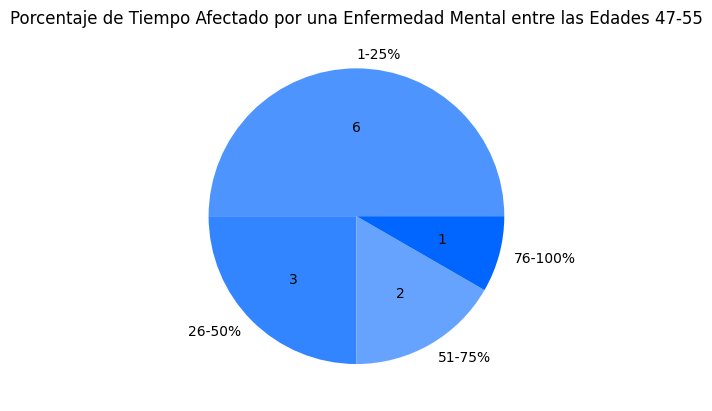

In [ ]:
import matplotlib.pyplot as plt

# Datos
labels = ['1-25%', "26-50%", '51-75%', "76-100%"]
sizes = [6, 3, 2, 1]

# Crear figura y axe
fig, ax = plt.subplots()

colores = ['#4d94ff', '#3385ff', '#66a3ff', '#0066ff']

# Crear gráfico circular
ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p* sum(sizes) / 100), colors=colores)

# Título del gráfico
ax.set_title('Porcentaje de Tiempo Afectado por una Enfermedad Mental entre las Edades 47-55')

# Mostrar gráfico
plt.show()

Entre las personas de 47 a 55 años que afirman tener una enfermedad mental diagnosticada, se observa una distribución variable en cuanto al impacto de estas condiciones en su tiempo laboral:

Afectación leve (1-25%): 6 personas (37.5%) reportan que su enfermedad mental afecta su tiempo laboral en un rango bajo, entre 1% y 25%.
Afectación moderada (26-50%): 3 personas (18.75%) indican que su enfermedad mental impacta su tiempo laboral en un rango moderado, entre 26% y 50%.
Afectación significativa (51-75%): 2 personas (12.5%) reportan una afectación significativa, con un impacto en su tiempo laboral entre 51% y 75%.
Afectación grave (76-100%): 1 persona (6.25%) indica una afectación grave, con un impacto en su tiempo laboral superior al 75%

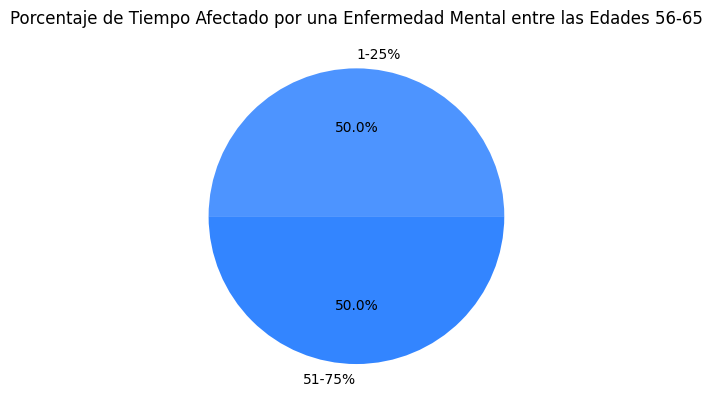

In [3]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Datos
data = [2, 2]  # example data
total = sum(data)
labels = ['1-25%', '51-75%']
sizes = [float(d) / total * 100 for d in data]

# Crear figura y axe
fig, ax = plt.subplots()

colores = ['#4d94ff', '#3385ff', '#66a3ff', '#0066ff']

# Crear gráfico circular
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)

# Título del gráfico
ax.set_title('Porcentaje de Tiempo Afectado por una Enfermedad Mental entre las Edades 56-65')

# Mostrar gráfico
plt.show()

Entre las personas de 56-65 años que afirman tener una enfermedad mental diagnosticada, se observa una distribución variable en cuanto al impacto de estas condiciones en su tiempo laboral:

Afectación leve (1-25%): 2 personas (50%) reportan que su enfermedad mental afecta su tiempo laboral en un rango bajo, entre 1% y 25%.
Afectación significativa (51-75%): 2 personas (50%) reportan una afectación significativa, con un impacto en su tiempo laboral entre 51% y 75%.


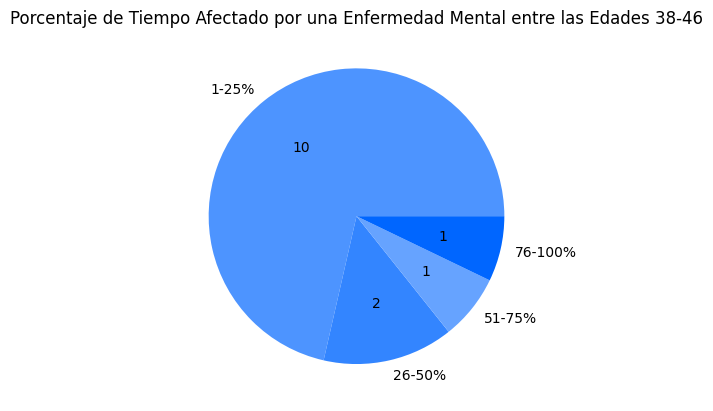

In [ ]:
import matplotlib.pyplot as plt

# Datos
labels = ['1-25%', '26-50%', '51-75%', '76-100%']
sizes = [10, 2, 1, 1]

# Crear figura y axe
fig, ax = plt.subplots()

colores = ['#4d94ff', '#3385ff', '#66a3ff', '#0066ff']

# Crear gráfico circular
ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p* sum(sizes) / 100), colors=colores)

# Título del gráfico
ax.set_title('Porcentaje de Tiempo Afectado por una Enfermedad Mental entre las Edades 38-46')

# Mostrar gráfico
plt.show()

Entre las personas de 36 a 46 años que afirman tener una enfermedad mental diagnosticada, se observa una distribución variable en cuanto al impacto de estas condiciones en su tiempo laboral:

Afectación leve (1-25%): 10 personas (71.42%) reportan que su enfermedad mental afecta su tiempo laboral en un rango bajo, entre 1% y 25%.
Afectación moderada (26-50%): 2 personas (12.28%) indican que su enfermedad mental impacta su tiempo laboral en un rango moderado, entre 26% y 50%.
Afectación significativa (51-75%): 1 personas (7.14%) reportan una afectación significativa, con un impacto en su tiempo laboral entre 51% y 75%.
Afectación grave (76-100%): 1 persona (7.14%) indica una afectación grave, con un impacto en su tiempo laboral superior al 75%



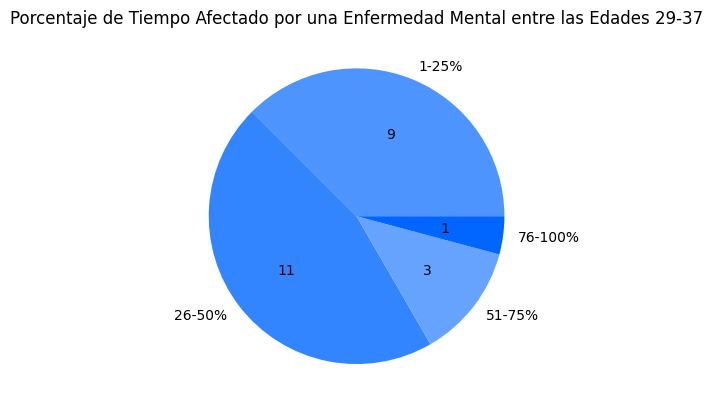

In [ ]:
import matplotlib.pyplot as plt

# Datos
labels = ['1-25%', '26-50%', '51-75%', '76-100%']
sizes = [9, 11, 3, 1]

# Crear figura y axe
fig, ax = plt.subplots()

colores = ['#4d94ff', '#3385ff', '#66a3ff', '#0066ff']

# Crear gráfico circular
ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p* sum(sizes) / 100), colors=colores)

# Título del gráfico
ax.set_title('Porcentaje de Tiempo Afectado por una Enfermedad Mental entre las Edades 29-37')

# Mostrar gráfico
plt.show()

Entre las personas de 29 a 37 años que afirman tener una enfermedad mental diagnosticada, se observa una distribución variable en cuanto al impacto de estas condiciones en su tiempo laboral:

Afectación leve (1-25%): 9 personas (37.5%) reportan que su enfermedad mental afecta su tiempo laboral en un rango bajo, entre 1% y 25%.
Afectación moderada (26-50%): 11 personas (45.83%) indican que su enfermedad mental impacta su tiempo laboral en un rango moderado, entre 26% y 50%.
Afectación significativa (51-75%): 3 personas (12.5%) reportan una afectación significativa, con un impacto en su tiempo laboral entre 51% y 75%.
Afectación grave (76-100%): 1 persona (4.16%) indica una afectación grave, con un impacto en su tiempo laboral superior al 75%


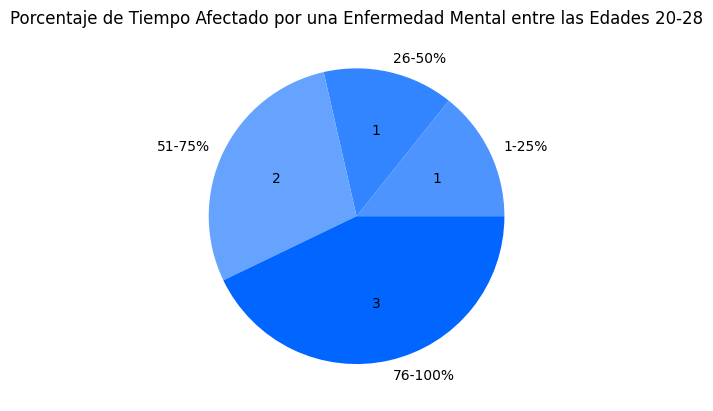

In [ ]:
import matplotlib.pyplot as plt

# Datos
labels = ['1-25%', '26-50%', '51-75%', '76-100%']
sizes = [1, 1, 2, 3]

# Crear figura y axe
fig, ax = plt.subplots()

colores = ['#4d94ff', '#3385ff', '#66a3ff', '#0066ff']

# Crear gráfico circular
ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p* sum(sizes) / 100), colors=colores)

# Título del gráfico
ax.set_title('Porcentaje de Tiempo Afectado por una Enfermedad Mental entre las Edades 20-28')

# Mostrar gráfico
plt.show()

Entre las personas de 20 a 28 años que afirman tener una enfermedad mental diagnosticada, se observa una distribución variable en cuanto al impacto de estas condiciones en su tiempo laboral:

Afectación leve (1-25%): 1 personas (14.28%) reportan que su enfermedad mental afecta su tiempo laboral en un rango bajo, entre 1% y 25%.
Afectación moderada (26-50%): 1 personas (14.28%) indican que su enfermedad mental impacta su tiempo laboral en un rango moderado, entre 26% y 50%.
Afectación significativa (51-75%): 2 personas (28.57%) reportan una afectación significativa, con un impacto en su tiempo laboral entre 51% y 75%.
Afectación grave (76-100%): 3 persona (42.85%) indica una afectación grave, con un impacto en su tiempo laboral superior al 75%
